<h1 align="center">Оценка качества моделей и отбор признаков</h1>

МФТИ ФИВТ: Курс Машинное Обучение (осень, 2016), Зухба Анастасия, a__l@mail.ru

<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:



**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2016_fall <номер_группы> <фамилия>``, к примеру -- ``ML2016_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb``, к примеру -- ``ivanov_401_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2016_fall Question <Содержание вопроса>``

--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было 

<h1 align="center">Check Questions</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1**: В каких ситуациях полезно использовать AUC-ROC?

AUC-ROC - area under ROC-curve используется для сравнения бинарных классификаторов, выдающих score для классов. 

**Вопрос 2**: Когда использование precision/recall предпочтительнее, чем AUC-ROC?

Использование precision/recall (а точнее AUC-PRECISION/RECALL, раз мы говорим о бинарных классификаторах, выдающих score) предпочтительнее, когда классы несбалансированные, так как AUC-ROC не зависит от баланса классов, а AUC-PR зависит.

**Вопрос 3**: Для чего используются внутренние критерии, а для чего внешние?

Внутренние критерии оценивают качетсво модели на обучающей выборке во время обучения, внешние -- на тестовой. Внутренние критерии используются для подбора параметров модели, внешние -- для оценка качества выбранной модели.

**Вопрос 4**: Чем эмпирические критерии отличаются от аналитических?

Эмперические критерии основываются на выборке, аналитические -- на внутренней структуре модели.

**Вопрос 5**: Что такое критерий регуляризации?

Критерий регуляризации используется, когда может существовать много оптимальных параметров модели для некоторой функции потерь. В этом случае вводится регуляризация, поощрающая параметры, которые улучшают общую обобщающую способность модели.

# Определение спама по тексту электронного письма

Попробуем при помощи моделей машинного обучения построить алгоритм, отделяющий спам от нормальной почты. Для экспериментов воспользуемся небольшим набором данных с UCI. Объекты в датасете соответствуют письмам, которые описаны признаками на основе текста письма, спам — положительный пример для классификации, хорошее письмо — отрицательный пример.

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Загрузка датасета Spambase

In [5]:
import pandas
import urllib2

SPAMBASE_NAMES_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names'
SPAMBASE_DATA_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'

feature_names = [
    line.strip().split(':')[0] 
    for line in urllib2.urlopen(SPAMBASE_NAMES_URL).readlines()[33:]
]
spam_data = pandas.read_csv(SPAMBASE_DATA_URL, header=None, names=(feature_names + ['spam']))
 
X, y = spam_data.ix[:, :-1].values, spam_data.ix[:, -1].values
 
spam_data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


**Задание**
- Сколько примеров писем в датасете?
- Какова доля плохих писем?
- Какие характерные группы признаков представлены в наборе?

In [6]:
print("Плохих писем {}".format(y[y == 1].shape[0]))
print("Доля плохих писем {}".format(y[y == 1].shape[0] * 1.0 / len(y)))
print("Список фичей: \n{}".format("\n".join(feature_names)))

Плохих писем 1813
Доля плохих писем 0.394044772875
Список фичей: 
word_freq_make
word_freq_address
word_freq_all
word_freq_3d
word_freq_our
word_freq_over
word_freq_remove
word_freq_internet
word_freq_order
word_freq_mail
word_freq_receive
word_freq_will
word_freq_people
word_freq_report
word_freq_addresses
word_freq_free
word_freq_business
word_freq_email
word_freq_you
word_freq_credit
word_freq_your
word_freq_font
word_freq_000
word_freq_money
word_freq_hp
word_freq_hpl
word_freq_george
word_freq_650
word_freq_lab
word_freq_labs
word_freq_telnet
word_freq_857
word_freq_data
word_freq_415
word_freq_85
word_freq_technology
word_freq_1999
word_freq_parts
word_freq_pm
word_freq_direct
word_freq_cs
word_freq_meeting
word_freq_original
word_freq_project
word_freq_re
word_freq_edu
word_freq_table
word_freq_conference
char_freq_;
char_freq_(
char_freq_[
char_freq_!
char_freq_$
char_freq_#
capital_run_length_average
capital_run_length_longest
capital_run_length_total


Классы фичей: частота слов, букв, различные признаки заглавных букв

### Обучение классификатора и оценка его качества

Обучение и оценка качества модели производится на независимых множествах примеров. Как правило, имеющующиеся примеры разбивают на два подмножества: обучение (train) и контроль (test). Выбор пропорции разбиения — компромисс: большой размер обучения ведет к более богатым информацией и качественным алгоритмам, большой размер контрольной выборки ведет к менее шумной оценке качества.

Для оценки качества классификации рассматривают матрицу ошибок: строчки соответствуют истинному классу, столбцы — предсказанному классификатором, ячейки содержат число примеров тестовой выборки.

<img src="confusion_matrix.png">

Диагональ матрицы ошибок содержит правильно классифицированные положительные (TP) и отрицательные (TN) примеры. False Positive (FP) — ошибки I рода (ложное срабатывание, положили в спам хорошее письмо), False Negative (FN) — ошибки II рода (не отфильтровали спам). Ошибки I и II рода могут иметь различную стоимость.

Часто рассматриваются следующие метрики качества бинарной классификации:

- Accuracy = (TP + TN) / (TP + TN + FP + FN) — доля правильных ответов
- Precision = TP / (TP + FP) — точность, доля спама среди писем, классифицированных как спам
- Recall = TP / (TP + FN) — полнота, доля спама, которая была отфильтрована
- F1 = 2TP / (2TP + FP + FN) — среднее гармоническое между точностью и полнотой

**Задание**
- Разбейте набор примеров на две непересекающиеся подвыборки следующим образом: train — первые 3000 примеров (≈65%), test — все остальные примеры.
- Обучите решающее дерево на train. Классифицируйте примеры из test. Посчитайте метрики качества классификации, описанные выше: Accuracy, Precision, Recall, F1. Рекомендованные параметры решающего дерева: разбиение по критерию gini, максимальная глубина: 7.
- Какие есть недостатки у получившейся оценки качества на подвыборке test? Как можно сделать оценку качества более информативной?
- Повторите эксперимент, перемешав случайно объекты исходной выборки перед разбиением.
- Какие признаки оказались наиболее важными для определения спама? Воспользуйтесь оценками важности признаков, полученых при построении решающего дерева.
- Какое качество дает лучшая константная модель (определяющая класс определенно и вне зависимости от признаков)?
- Обучите модель KNN и оцените ее качество на test. Рекомендованные параметры: K=10, евклидова метрика в качестве расстояния.
- Обучите модель KNN, предварительно приведя значения признаков к одинаковому масштабу. Оцените качество полученной модели на test. Дает ли подобное преобразование признаков прирост качества для модели KNN? Проделайте тот же эксперимент с решающим деревом. Почему масштабирование признаков не влияет на качество решающего дерева, но повышает качество классификации модели KNN?
- Сравните все обученные модели по всем метрикам.


В итоге должны быть построены и сравнены между собой следующие модели:

1) Константная модель
2) Решающее дерево
3) KNN
4) KNN с масштабированием признаков

In [7]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

def print_metrics(y_true, y_predict):
    for score in [precision_score, recall_score, accuracy_score, f1_score]:
        print("{} {}".format(score.__name__, score(y_true, y_predict)))

In [8]:
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [9]:
X_train, X_test, y_train, y_test = X[:3000], X[3000:], y[:3000], y[3000:]

In [10]:
# Decision Tree Classifier (imbalanced dataset)
clf_tree = DecisionTreeClassifier(max_depth=7, criterion='gini')
clf_tree.fit(X_train, y_train)
print_metrics(y_test, clf_tree.predict(X_test))

precision_score 0.0
recall_score 0.0
accuracy_score 0.770768269831
f1_score 0.0


/Users/astepanov/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1076: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/Users/astepanov/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1076: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


Как видим, все score кроме accuracy равны нулю из-за того, что в тестовой выборке нет положительных примеров. **sklearn даже выдал warning по этому поводу.** Если бы мы использовали только accuracy в качестве метрики, мы бы не заметили проблемы. Воспользуемся функцией train_test_split для того, чтобы разделить выборку на трейн и тест

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.65)

In [12]:
clf_tree = DecisionTreeClassifier(max_depth=7, criterion='gini')
clf_dummy = DummyClassifier("prior")
clf_knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
clf_knn_scaled = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=10, metric='euclidean'))
clf_tree_scaled = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=7, criterion='gini'))
clf_list = [clf_tree, clf_dummy, clf_knn, clf_knn_scaled, clf_tree_scaled]
clf_names = ["Tree", "Dummy", "Knn", "Knn scaled", "Tree scaled"]

In [14]:
for clf, name in zip(clf_list, clf_names):
    print(name)
    clf.fit(X_train, y_train)
    print_metrics(y_test, clf.predict(X_test))
    print

Tree
precision_score 0.941489361702
recall_score 0.8496
accuracy_score 0.921166977033
f1_score 0.893187552565

Dummy
precision_score 0.0
recall_score 0.0
accuracy_score 0.612042209808
f1_score 0.0

Knn
precision_score 0.758095238095
recall_score 0.6368
accuracy_score 0.780260707635
f1_score 0.692173913043

Knn scaled
precision_score 0.896907216495
recall_score 0.8352
accuracy_score 0.898820608318
f1_score 0.864954432477

Tree scaled
precision_score 0.942857142857
recall_score 0.8448
accuracy_score 0.919925512104
f1_score 0.891139240506



Как видим, масштабирование признаков не повлияло на дерево, но сильно повлияло на kNN. Это все потому, что дерево перебирает пороги основываясь на значениях фичей на выборке, а они деформируются монотонно. kNN же основывается не на относительном расположении значения на оси фичи, а на метках ближайших к данному объекту соседей, а ближайшие соседи могут поменятся (напрмер, если одна ось сжимается сильнее, чем другая)

### Выбор порога классификации

Многие модели классификации получают оценку принадлежности положительному классу $y'(x)\in R$. Затем принимают решение о классе объекта путем сравнения оценки с порогом: $y(x)=+1$, если $y'(x)<\theta$, $y(x)=−1$, если $y'(x)\geq\theta$

Матрица ошибок и все производные от нее метрики (Accuracy, Precision, Recall, etc.) зависят от порога $\theta$.


<img src="binary_threshold.png">

Для того чтобы видеть изменения метрик при всех значениях порога классификации, рассматривают координатную плоскость, по осям которой отложены значения метрик, а качество работы классификатора представлено в виде кривой — траектории изменения соответствующих метрик при варьировании порога:

<img src="roc_trajectory.png">

Наиболее распространены ROC-кривые (плоскость TP-vs-FP) и Precision/Recall кривые. Аббревиатура ROC (Receiver Operating Characteristic) была унаследована из инженерного дела.

<img src="roc_and_pr_curves.png">

В случае, если необходимо сравнить качество классификаторов вне зависимости от порога, применяют интегральные числовые метрики, например AUC-ROC (Area Under ROC) — площадь под ROC-кривой классификатора. AUC-ROC идеально работающего классификатора равно 1. Идеальный случайный классификатор в среднем имеет AUC-ROC=0.5.



**Задача 1**

Определите функционал «доля дефектных пар» для задачи бинарной классификации. Как данный функционал связан с AUC-ROC?

Пусть $l_+$ -- доля положительных примеров, $l_-$ -- отризательных. $l = l_+ + l_-$. Пусть $y_{(i)}$ -- класс i-того объекта в порядке сортировки по скору, который выдал классификатор. Тогда доля дефектных пар это

$$DP = \frac{2}{l (l - 1)} \sum_{i < j} [y_{(i)} > y_{(j)}]$$

Оказывается, $$DP = \frac{2l_+ l_-}{l (l-1)}(1-AUC)$$

Доказательство: будем строить ROC кривую последовательно, начиная от точки (0, 0). Для этого пойдем по массиву $y_{(1)}, ..., y_{(l)}$ с конца. Точка $(0, 0)$ соответсвтует порогу $score_{(l)}$. Далее, если на данном шаге $y_{(i)} == 0$, то проведя порог по $score_{(i)}$ мы увеличим FPR. Если же $y_{(i)} == 1$, то проведя порог по данном объекту, мы увеличим TPR. AUC - это сумма по всем столбцам ($y_{(i)} == 0$) ширины столбца ($\frac{1}{l_-}$) на высоту ($\frac{1}{l_+} \sum_{j > i} [y_{(j)} == 1]$)
В итоге получаем
$$AUC = \frac{1}{l_+l_-} \sum_{j > i} [y_{(i)} == 0] [y_{(j)} == 1] = \frac{1}{l_+l_-}\sum_{j>i} [y_{(i)} < y_{(j)}] = \frac{1}{l_-l_+}\sum_{i<j}\big(1 - [y_{(i)} == y_{(j)}] - [y_{(i)} > y_{(j)}] \big)$$

Тогда получаем, что

$$l_+l_-AUC = \frac{l(l-1)}{2} - \frac{l_+(l_+ - 1)}{2} - \frac{l_-(l_- - 1)}{2} - \frac{l(l-1)}{2}DP = l_+l_- - \frac{l(l-1)}{2}DP$$

То есть
$$DP = \frac{2}{l (l - 1)} \sum_{i < j} [y_{(i)} > y_{(j)}]$$

**Задача 2**

Приведите пример целевого вектора $y_1, \ldots , y_l$ и ответов алгоритма $b(x_1),\ldots,b(x_l)$, для которых AUC-ROC будет равен 0.5.


Произвольный вектор y и все ответы $b(x_i) == b_0$. Тогда есть 2 значения порога, первый t <= b_0, тогда fpr = tpf = 1, второй t > b_0 тогда fpr=tpr=0. В итоге получаем AUC-ROC 0.5

**Задание**

 Верно ли, что классификаторы из предыдущей части действуют путем сравнения некоторой оценки принадлежности положительному классу с порогом? Что это за оценки принадлежности? Какие пороги были выбраны?
 
 Для всех моделей, построенных в предыдущем задании:
- Постройте ROC и Precision/Recall кривые в одних координатных осях, линиями разных цветов. Добавьте легенду: какая кривая соответствует какому классификатору.
- Сравните значения AUC-ROC.

Какой максимальной полноты определения спама достигают построенные классификаторы, если перед вами стоит жесткое ограничение: точность классификатора не может быть меньше 90%?



Построенные классификаторы действуют путем сравнения некоторой оценки принадлежности к положительному классу с порогом. Для дерева это доля положительных объектов в листе, она должна быть > 0.5 для положительной классификации объекта. Для kNN - количество положительных объектов к данному из n_neighbours ближайших, для отнесения к положительному классу оно должно быть > n_neighbours/2

In [30]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

ROC-AUC
Tree 0.925086409736
If precision >= 0.9 then max recall is 0.8624
Dummy 0.5
If precision >= 0.9 then max recall is 0.0
Knn 0.851476673428
If precision >= 0.9 then max recall is 0.0864
Knn scaled 0.957722515213
If precision >= 0.9 then max recall is 0.768
Tree scaled 0.921085598377
If precision >= 0.9 then max recall is 0.8672


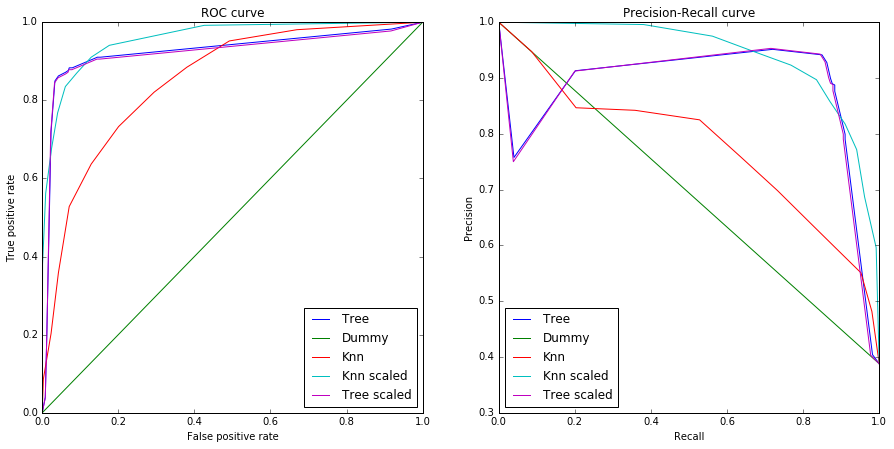

In [60]:
print("ROC-AUC")
f, ax = plt.subplots(1, 2, figsize=(15, 7))
for clf, name in zip(clf_list, clf_names):
    scores = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, scores)
    prs, rcs, _ = precision_recall_curve(y_test, scores)
    ax[0].plot(fpr, tpr)
    ax[1].plot(rcs, prs)
    print("{} {}".format(name, roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])))
    print("If precision >= 0.9 then max recall is {}".format(max(rcs[prs >= 0.9])))
ax[0].set_ylabel("True positive rate")
ax[0].set_xlabel("False positive rate")
ax[0].legend(clf_names, loc=4)
ax[0].set_title("ROC curve")

ax[1].set_ylabel("Precision")
ax[1].set_xlabel("Recall")
ax[1].legend(clf_names, loc=3)
ax[1].set_title("Precision-Recall curve")
plt.show()

### Кросс-валидация и подбор параметров

Каждая модель машинного обучения имеет множество структурных параметров и параметров обучения: число соседей и тип функции расстояния в KNN, максимальная высота дерева, минимальное число объектов в листе дерева и т.д. Нет универсальных наборов параметров, оптимально работающих во всех задачах, для каждой задачи нужно подбирать свой набор параметров.

Для оптимизации параметров модели часто используют перебор по сетке (grid search): для каждого параметра выбирается несколько значений, перебираются все комбинации значений параметров и выбирается комбинация, на которой модель показывает лучшее качество (с точки зрения метрики, которая оптимизируется).

Сравнение большого числа моделей при переборе параметров приводит к ситуации, когда лучшая на тестовой подвыборке модель не сохраняет свои качества на новых данных. Можно сказать, что происходит переобучение на тестовую выборку.

Для устранения этой проблемы, данные разбивают на 3 непересекающихся подвыборки: обучение (train), валидация (validation) и контроль (test).

Валидационную подвыборку используют для сравнения моделей, а test — для окончательной оценки качества и сравнения семейств моделей с подобранными параметрами.

Более надежный способ объективного сравнения моделей — кросс-валидация. Существуют различные схемы кросс-валидации:

- Leave-One-Out
- K-Fold
- Многократное случайное разбиение выборки
Кросс-валидация вычислительно затратна, особенно если вы делаете перебор по сетке с очень большим числом комбинаций. С учетом конечности времени на выполнение задания, возникает ряд компромиссов:

- сетку можно делать более разреженной, перебирая меньше значений каждого параметра, но в таком случае можно пропустить хорошую комбинацию параметров;
- кросс-валидацию можно делать с меньшим числом разбиений или фолдов, но в таком случае оценка качества кросс-валидации становится более шумной и увеличивается риск выбрать неоптимальный набор параметров из-за случайности разбиения;
- параметры можно оптимизировать последовательно (жадно) — один за другим, а не перебирать все комбинации; такая стратегия не всегда приводит к оптимальному набору;
- перебирать не все комбинации параметров, а небольшое число случайно выбранных.

**Задание**
- Выберите схему кросс-валидаци, одну из перечисленных выше. Зафиксируйте разбиение кросс-валидации обучающей выборки. Кросс-валидировать нужно по выборке train из предыдущих заданий, test должен остаться независимым. Обратите внимание: при сравнении моделей, набор разбиений кросс-валидации не должен меняться, должен быть строго фиксированным.
- Выберите одну метрику, которую будете оптимизировать при переборе параметров. Например, можно взять AUC-ROC.
- Найдите оптимальный набор параметров дерева, перебрав значения параметров по сетке. Параметры для настройки: критерий разбиения, максимальная глубина, число признаков для каждого узла, минимальное число объектов в листе (или часть из этих параметров).
- Найдите оптимальный набор параметров для KNN, перебрав значения параметров по сетке. Параметры для настройки: число соседей, функция расстояния, схема взвешивания (или часть из этих параметров).
- Сравните полученные модели с моделями из предыдущих заданий. Сравнение необходимо проводить на тестовой выборке, которая не участвовала в подборе и обучении. Сравнение нужно проводить только по метрике которая оптимизировалась.

In [56]:
from sklearn.cross_validation import KFold
from sklearn.grid_search import GridSearchCV

cv = KFold(len(X_train), n_folds=5, shuffle=True)

def scorer(estimator, X, y):
    return roc_auc_score(y, estimator.predict_proba(X)[:, 1])

def run_grid_search(estimator, params):
    grid_search = GridSearchCV(estimator, params, scoring=scorer, n_jobs=4, cv=cv)
    grid_search.fit(X_train, y_train)
    print(grid_search.best_estimator_)
    print(scorer(grid_search.best_estimator_, X_test, y_test))

In [57]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": list(range(1, 15)) + [None],
    "max_features": ["sqrt", "log2", None],
    "min_samples_leaf": [1, 2, 3, 5, 10],
}
run_grid_search(clf_tree, param_grid)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
0.957062068966


In [59]:
param_grid = {
    "kneighborsclassifier__n_neighbors": [1, 3, 5, 7, 9, 11, 13, 15],
    "kneighborsclassifier__metric": ["chebyshev", "manhattan", "euclidean"],
    "kneighborsclassifier__weights": ["uniform", "distance"]
}
run_grid_search(clf_knn_scaled, param_grid)

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kneighborsclassifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='distance'))])
0.976771602434
